<a href="https://colab.research.google.com/github/wayneotemah/AI-and-ML/blob/main/data__augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exersice 2
Write a function that can shift an MNIST image in any direction
(left, right, up, or down) by one pixel.5 Then, for each image in
the training set, create four shifted copies (one per direction) and
add them to the training set. Finally, train your best model on this
expanded training set and measure its accuracy on the test set.
You should observe that your model performs even better now!
This technique of artificially growing the training set is called
data augmentation or training set expansion.

In [1]:
#import neccessary libraires 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#fetch the dataset 
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)

In [54]:
# Split the data
X,y = mnist['data'],mnist['target']
y = y.astype(np.uint8)


X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000],y[60000:]

In [55]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [56]:
def shift_down(arr, step):
  #shitp down
  x = arr.reshape(28, 28)
  x = x[:-step]
  fill =  np.full((step, 28), 0)
  x = np.concatenate((fill, x))
  x = x.reshape(784)
  return x

In [57]:
def shift_up(arr, step):
  #shift up
  x = arr.reshape(28, 28)
  x = arr.reshape(28, 28)
  x = x[step:]
  fill =  np.full((step, 28), 0)
  x = np.concatenate((x, fill))
  x = x.reshape(784)
  return x

In [58]:
def shift_right(arr, step):
  x = arr.reshape(28, 28)
  o = x
  new_o = np.array([])
  for A in  o :
    fill =  np.full((step), 0)
    A = A[:-step]
    A = np.concatenate((fill,A))
    new_o = np.concatenate((new_o, A))
  return new_o


In [59]:
def shift_left(arr, step):
  o = arr.reshape(28, 28)

  left_step = (28-step)
  new_o = np.array([])
  for A in  o :
    fill =  np.full((step), 0)
    A = A[-left_step:]
    A = np.concatenate((A,fill))
    new_o = np.concatenate((new_o, A))

  return new_o

In [60]:
X_expanded = np.zeros((X_train.shape[0] * 5, X_train.shape[1]))
y_expanded = np.zeros((y_train.shape[0] * 5,))

for i in range(X_train.shape[0]):
  image = X_train.iloc[i].to_numpy() # get originol image


   # Add the original image and the shifted copies to the expanded training set

  X_expanded[i * 5] = image                     # add old array to the new training set
  X_expanded[i * 5 + 1] = shift_left(image,1)   #shitf Arr left and save new array in X_new_training_set
  X_expanded[i * 5 + 2] = shift_right(image,1)  # shift Arr right
  X_expanded[i * 5 + 3] = shift_up(image,1)     # shift Arr up
  X_expanded[i * 5 + 4] = shift_down(image,1)   # shift Arr down

   
  y_expanded[i * 5] = y_train[i]
  y_expanded[i * 5 + 1] = y_train[i]
  y_expanded[i * 5 + 2] = y_train[i]
  y_expanded[i * 5 + 3] = y_train[i]


In [61]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_expanded, y_expanded)

KNeighborsClassifier(n_neighbors=3)

In [62]:
y_pred = model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [63]:
accuracy = accuracy_score(y_test, y_pred)
accuracy*100

87.09

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

conf_mx = confusion_matrix(y_test, y_pred)
print(f'confussion metrix')
print(f'{conf_mx}')

confussion metrix
[[975   1   1   0   0   0   2   1   0   0]
 [157 977   1   0   0   0   0   0   0   0]
 [122   1 894   2   1   0   0  11   1   0]
 [135   1   3 857   0   7   0   4   2   1]
 [125   3   0   0 833   0   3   2   0  16]
 [123   2   0   7   0 752   2   1   3   2]
 [113   4   0   0   2   2 837   0   0   0]
 [113   7   1   1   2   0   0 900   0   4]
 [135   0   4   9   2   6   0   3 812   3]
 [115   3   1   5   4   3   1   5   0 872]]


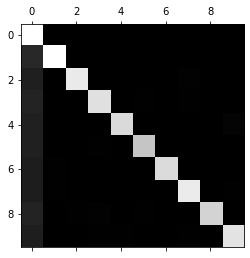

In [65]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()